# Image Segmentation


1. Snakes algorithm
2. Watershed algorithm
3. K Means
4. Mean shift

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.filters import gaussian
from skimage.segmentation import active_contour

## 1. Snakes algorithm

In [ ]:
img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
r = 170 + 150*np.sin(s)
c = 150 + 150*np.cos(s)
init = np.array([r, c]).T

gaussian_img = gaussian(img, 3, preserve_range=False)

snake = active_contour(gaussian_img,
                       init, alpha=0.015,
                       beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=1)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## 3. K means

In [2]:
def initialize_clusters(data, k):
    """
    Initialize clusters randomly from data points.
    """
    n_samples, _ = data.shape
    indices = np.random.choice(n_samples, k, replace=False)
    # print(indices)
    return data[indices]

In [9]:
def assign_clusters(data, clusters):
    """
    Assign each data point to the closest cluster centroid.
    """
    distances = np.linalg.norm(data[:, np.newaxis, :] - clusters, axis=2)
#     print(np.argmin(distances, axis=1))
    return np.argmin(distances, axis=1)

In [4]:
def update_clusters(data, assignments, k):
    """
    Update cluster centroids based on the mean of assigned data points.
    """
    new_clusters = np.zeros((k, data.shape[1]))
    for cluster_idx in range(k):
        cluster_data = data[assignments == cluster_idx]
        if len(cluster_data) > 0:
            new_clusters[cluster_idx] = np.mean(cluster_data, axis=0)
        else:
            # If no points assigned to the cluster, keep the centroid unchanged
            new_clusters[cluster_idx] = clusters[cluster_idx]
    return new_clusters

In [5]:
def kmeans(data, k, max_iters=100):
    """
    Perform K-means clustering on the given data.
    """
    # Initialize clusters
    clusters = initialize_clusters(data, k)

    # Iterate until convergence or max iterations
    for _ in range(max_iters):
        # Assign data points to the closest cluster centroid
        assignments = assign_clusters(data, clusters)

        # Update cluster centroids
        new_clusters = update_clusters(data, assignments, k)

        # Check for convergence
        if np.allclose(clusters, new_clusters):
            print("Converged.")
            break

        clusters = new_clusters

    return assignments, clusters

In [6]:
img = cv2.imread('forColorSeg.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
# Convert image to RGB (OpenCV reads image in BGR format)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape image data to 2D array
w, h, d = original_shape = tuple(image_rgb.shape)
image_2d = np.reshape(image_rgb, (w * h, d))

n_clusters = 3

# Maximum number of iterations
max_iters = 100

# Perform K-means clustering
assignments, clusters = kmeans(image_2d, n_clusters, max_iters)

# Assign each pixel to its corresponding cluster centroid
clustered_image = np.reshape(assignments, (w, h))

Converged.


In [12]:
print(image_2d)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [201 182  60]
 [201 181  59]
 [192 170  56]]


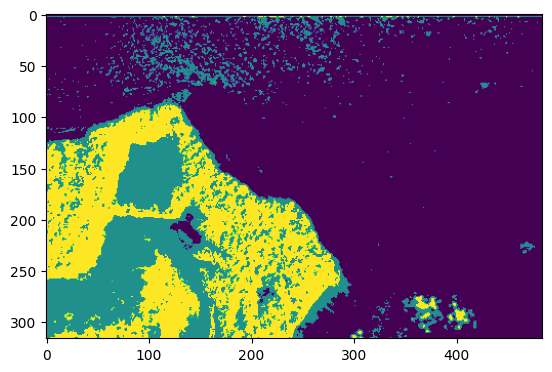

In [8]:
plt.imshow(clustered_image)